<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

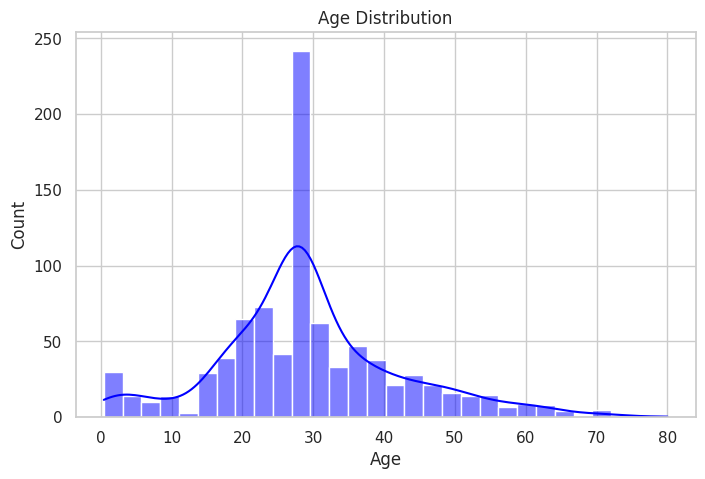

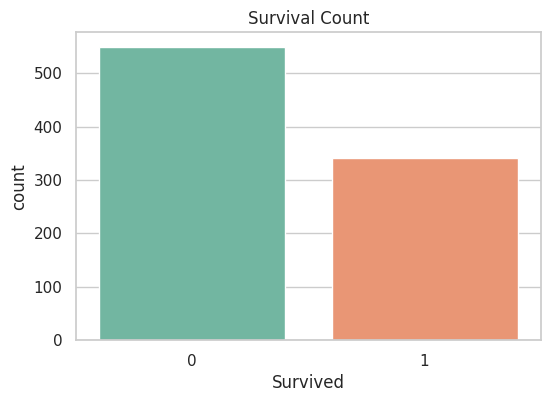

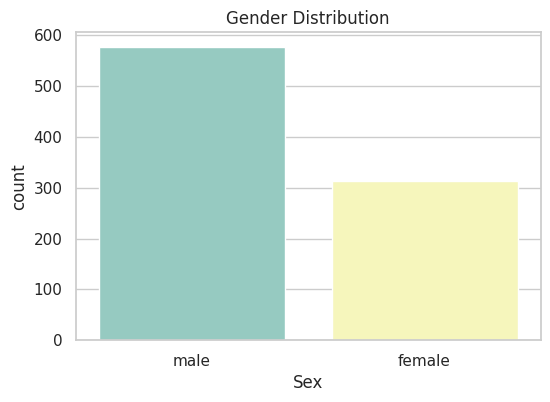

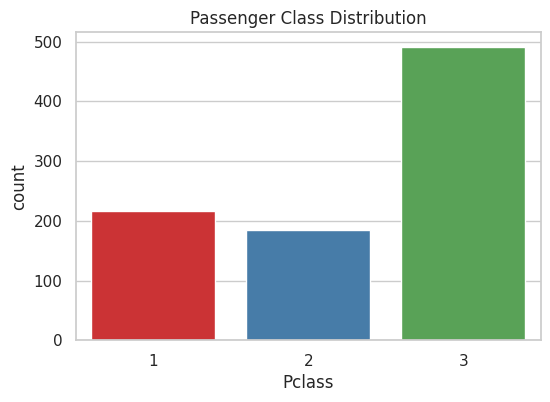

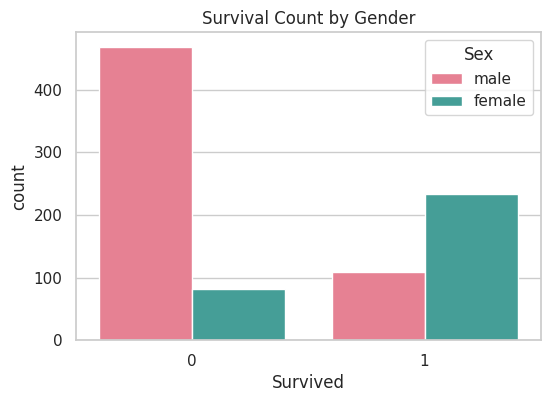

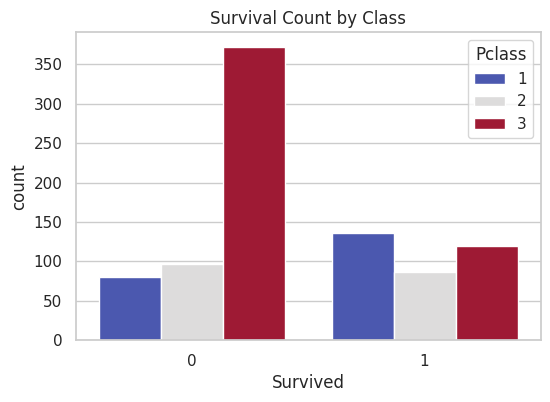

/tmp/ipython-input-1620685005.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette="Set2")


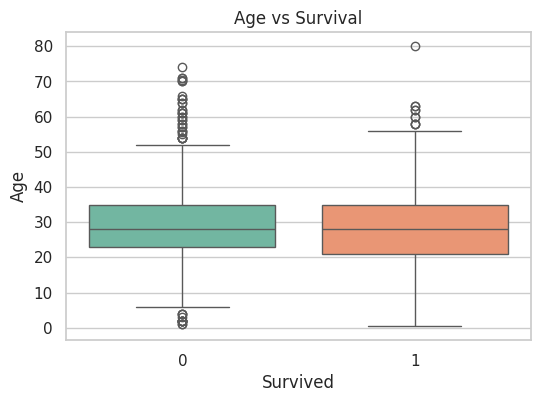

/tmp/ipython-input-1620685005.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette="Set3")


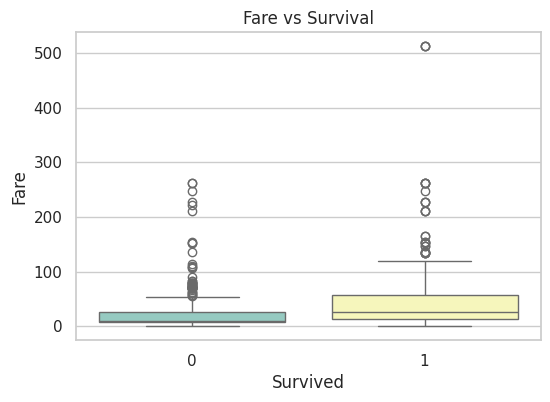

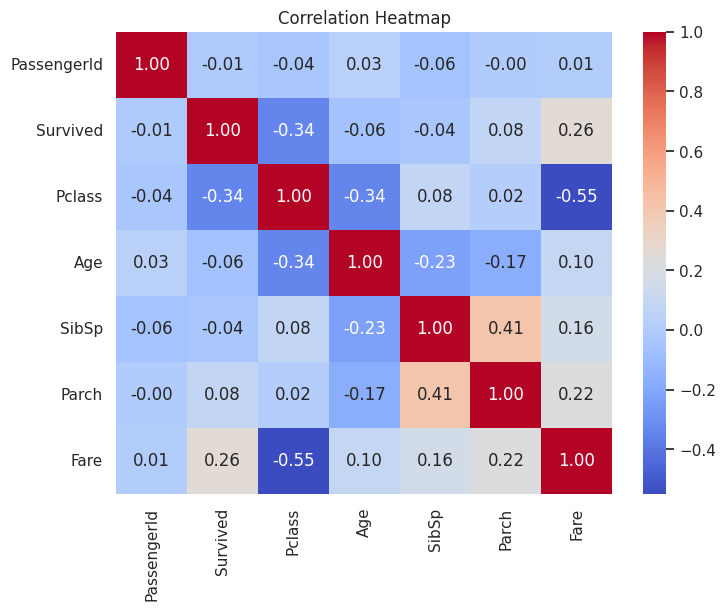

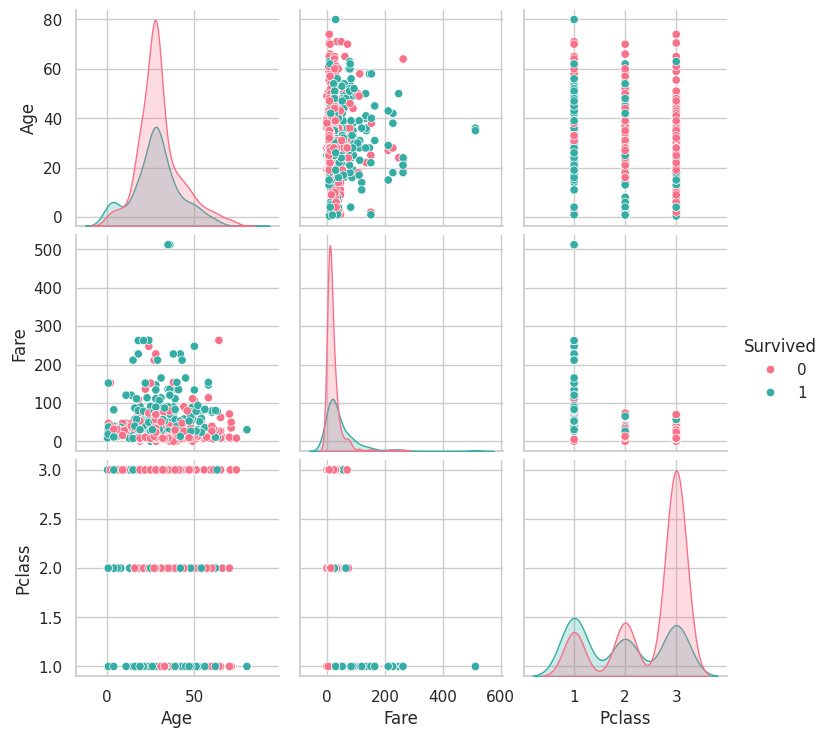


SUMMARY OF FINDINGS:

1. Females had a much higher survival rate than males.
2. Passengers in higher classes (Pclass 1) survived more often.
3. Most passengers were between 20–40 years old.
4. Higher fare generally increased survival chances.
5. Strong correlation between Pclass and Fare.
6. Cabin data had many missing values, so it was dropped.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv("train.csv")

print(df.info())
print(df.describe())
print(df.isnull().sum())

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

print(df.isnull().sum())

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30, color="blue")
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df, palette="Set2", hue='Survived', legend=False)
plt.title("Survival Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette="Set3", hue='Sex', legend=False)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df, palette="Set1", hue='Pclass', legend=False)
plt.title("Passenger Class Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=df, palette="husl")
plt.title("Survival Count by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Pclass', data=df, palette="coolwarm")
plt.title("Survival Count by Class")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df, palette="Set2", hue='Survived', legend=False)
plt.title("Age vs Survival")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df, palette="Set3", hue='Survived', legend=False)
plt.title("Fare vs Survival")
plt.show()

plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df[['Survived','Age','Fare','Pclass']], hue='Survived', palette="husl")
plt.show()

summary = """
SUMMARY OF FINDINGS:

1. Females had a much higher survival rate than males.
2. Passengers in higher classes (Pclass 1) survived more often.
3. Most passengers were between 20–40 years old.
4. Higher fare generally increased survival chances.
5. Strong correlation between Pclass and Fare.
6. Cabin data had many missing values, so it was dropped.
"""
print(summary)